In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! cat ./raw-data/attack_types.txt

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l



In [3]:
! cat ./raw-data/feature_names.txt

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
! cat ./raw-data/typo-correction.txt

Note of Correction (June 26, 2007)

There was one typo in this data set.  It was in row 4817100 
in kddcup.data (and line 485798 in kddcup.data_10_percent):

0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,00,tcp,http,SF,334,1684,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,9,0.00,0.00,0.00,0.00,0.33,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal.


Notice that part of another row was appended to this row 
(it probably was an accidental duplication of the row above).  
We have fixed the typo by removing the "partial row", so now
the row looks like this:

0,tcp,http,SF,334,1684,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,9,0.00,0.00,0.00,0.00,1.00,0.00,0.33,0,0,0.00,0.00,0.00,0.00,0.00,0.00,normal.

The correct data is now in kddcup.data.gz and kddcup-data_10_percent.gz.  

Many thanks to those who have notified us of this typo.

--Librarian


In [5]:
df = pd.read_csv("./raw-data/full_data.gz", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


### Get column names from feature_names.txt

In [6]:
with open("./raw-data/feature_names.txt", "r") as f:
    feature_names_contents = f.read().split("\n")
    print(feature_names_contents)
feature_names_contents = feature_names_contents[1:-1]
columns_names = [name.split(":")[0].strip().lower() for name in feature_names_contents]
columns_names.append("target")
print("="*125)
print(columns_names)

['back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.', 'duration: continuous.', 'protocol_type: symbolic.', 'service: symbolic.', 'flag: symbolic.', 'src_bytes: continuous.', 'dst_bytes: continuous.', 'land: symbolic.', 'wrong_fragment: continuous.', 'urgent: continuous.', 'hot: continuous.', 'num_failed_logins: continuous.', 'logged_in: symbolic.', 'num_compromised: continuous.', 'root_shell: continuous.', 'su_attempted: continuous.', 'num_root: continuous.', 'num_file_creations: continuous.', 'num_shells: continuous.', 'num_access_files: continuous.', 'num_outbound_cmds: continuous.', 'is_host_login: symbolic.', 'is_guest_login: symbolic.', 'count: continuous.', 'srv_count: continuous.', 'serror_rate: continuous.', 'srv_serror_rate: continuous.', 'rerror_rate: continuous.', 'srv_rerror_rate: continuous.', 'same_srv_rate: continuous.', 'diff_srv_rate: con

In [7]:
df.columns = columns_names

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     4898431 non-null  int64  
 1   protocol_type                4898431 non-null  object 
 2   service                      4898431 non-null  object 
 3   flag                         4898431 non-null  object 
 4   src_bytes                    4898431 non-null  int64  
 5   dst_bytes                    4898431 non-null  int64  
 6   land                         4898431 non-null  int64  
 7   wrong_fragment               4898431 non-null  int64  
 8   urgent                       4898431 non-null  int64  
 9   hot                          4898431 non-null  int64  
 10  num_failed_logins            4898431 non-null  int64  
 11  logged_in                    4898431 non-null  int64  
 12  num_compromised              4898431 non-n

In [9]:
print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 3823439


In [10]:
df.apply(pd.Series.nunique)

duration                        9883
protocol_type                      3
service                           70
flag                              11
src_bytes                       7195
dst_bytes                      21493
land                               2
wrong_fragment                     3
urgent                             6
hot                               30
num_failed_logins                  6
logged_in                          2
num_compromised                   98
root_shell                         2
su_attempted                       3
num_root                          93
num_file_creations                42
num_shells                         3
num_access_files                  10
num_outbound_cmds                  1
is_host_login                      2
is_guest_login                     2
count                            512
srv_count                        512
serror_rate                       96
srv_serror_rate                   87
rerror_rate                       89
s

In [11]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.drop_duplicates(inplace=True, ignore_index=True)

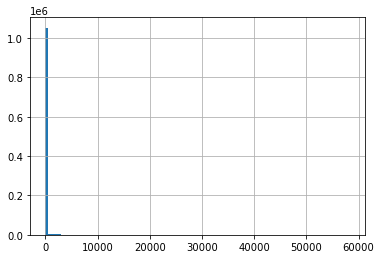

In [12]:
df["duration"].hist(bins=100)

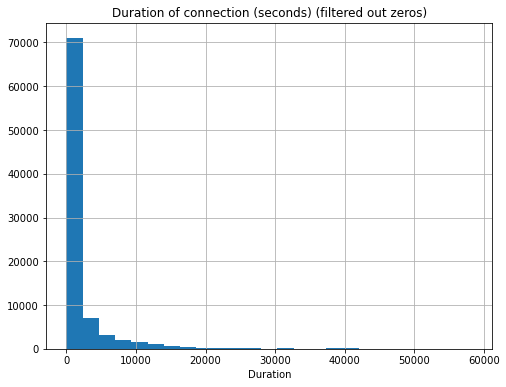

In [13]:
df.query("duration > 0")["duration"].hist(bins=25, figsize=(8, 6))
plt.title("Duration of connection (seconds) (filtered out zeros)")
plt.xlabel("Duration");

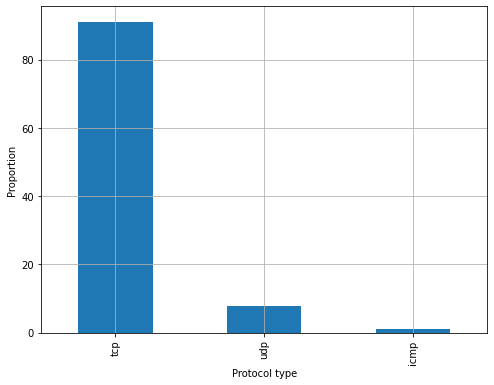

In [14]:
(100*df["protocol_type"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.xlabel("Protocol type")
plt.ylabel("Proportion");

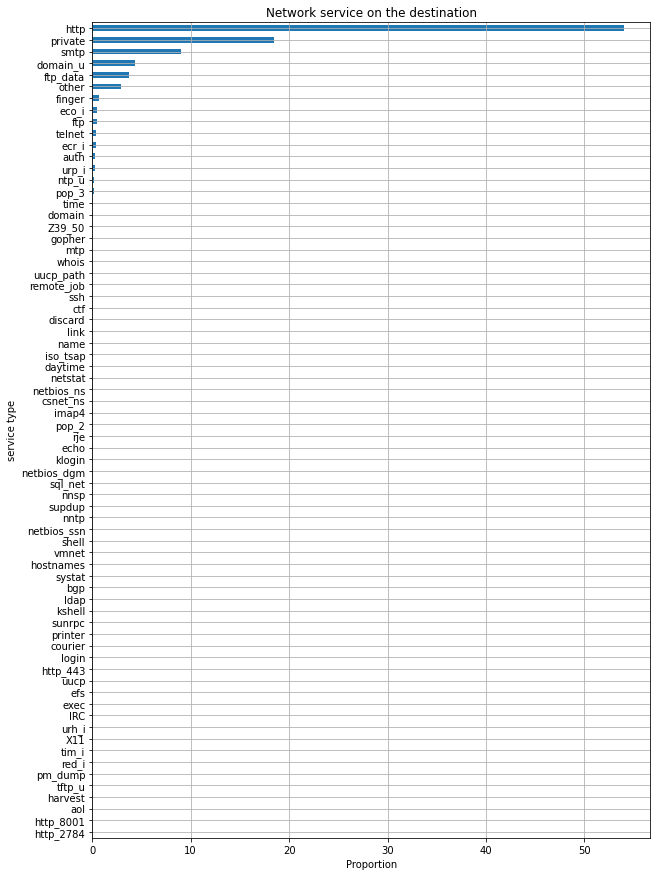

In [15]:
(100*df["service"].value_counts(normalize=True).sort_values()).plot(kind="barh", grid=True, figsize=(10, 15))
plt.title("Network service on the destination")
plt.ylabel("service type")
plt.xlabel("Proportion");

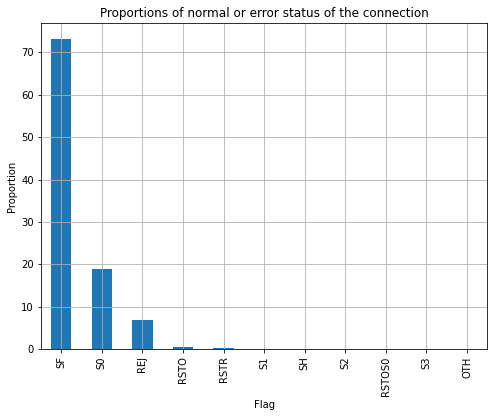

In [16]:
(100*df["flag"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("Proportions of normal or error status of the connection")
plt.xlabel("Flag")
plt.ylabel("Proportion");

In [17]:
(100*df["flag"].value_counts(normalize=True))

SF        73.194963
S0        18.936420
REJ        7.019308
RSTO       0.473492
RSTR       0.262793
S1         0.049489
SH         0.028186
S2         0.014884
RSTOS0     0.011349
S3         0.004651
OTH        0.004465
Name: flag, dtype: float64

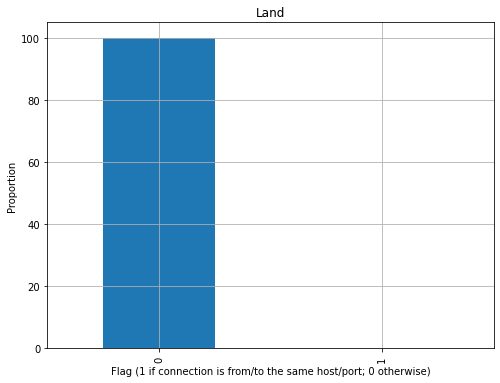

In [18]:
(100*df["land"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("Land")
plt.xlabel("Flag (1 if connection is from/to the same host/port; 0 otherwise)")
plt.ylabel("Proportion");

In [19]:
(100*df["land"].value_counts(normalize=True))

0    99.997581
1     0.002419
Name: land, dtype: float64

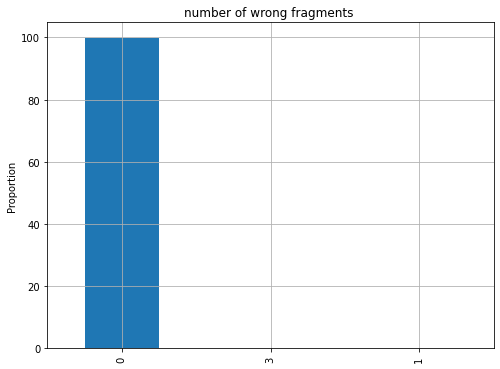

In [20]:
(100*df["wrong_fragment"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("number of wrong fragments ")
plt.ylabel("Proportion");

In [21]:
(100*df["wrong_fragment"].value_counts(normalize=True))

0    99.895720
3     0.084652
1     0.019628
Name: wrong_fragment, dtype: float64

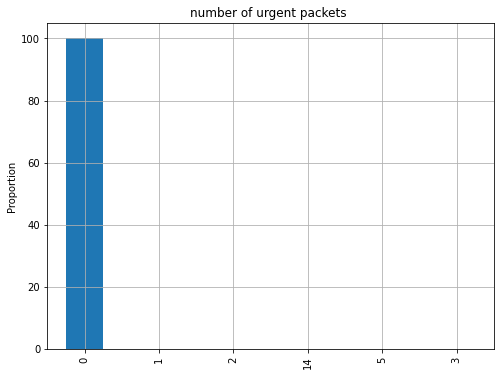

In [22]:
(100*df["urgent"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("number of urgent packets ")
plt.ylabel("Proportion");

In [23]:
(100*df["urgent"].value_counts(normalize=True))

0     99.998512
1      0.000837
2      0.000372
14     0.000093
5      0.000093
3      0.000093
Name: urgent, dtype: float64

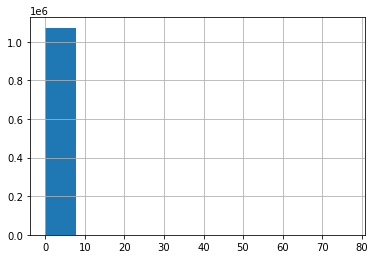

In [24]:
df["hot"].hist()

In [25]:
df["hot"].value_counts()

0     1068036
2        1411
1        1320
4         942
6         866
5         339
19        281
30        281
28        279
14        270
18        268
22        255
24        249
3          88
7          27
20         17
9          11
15          8
11          7
17          7
10          5
12          4
13          4
21          4
16          4
8           3
44          2
25          2
33          1
77          1
Name: hot, dtype: int64

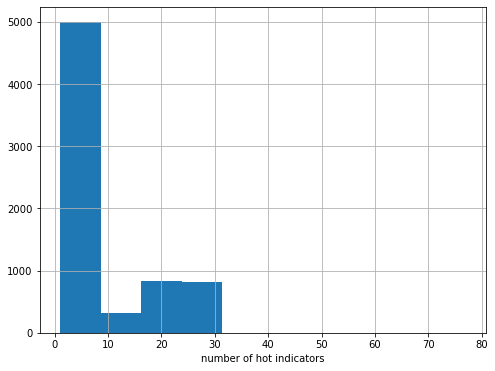

In [26]:
df.query("hot > 0")["hot"].hist(figsize=(8, 6))
plt.xlabel("number of hot indicators");

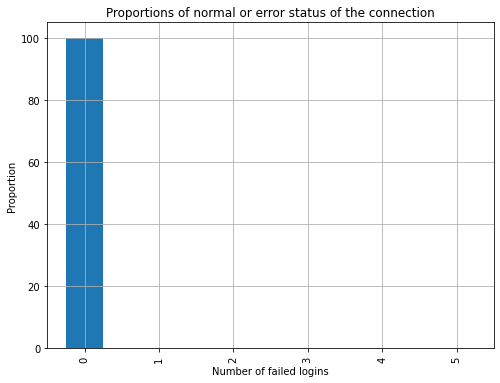

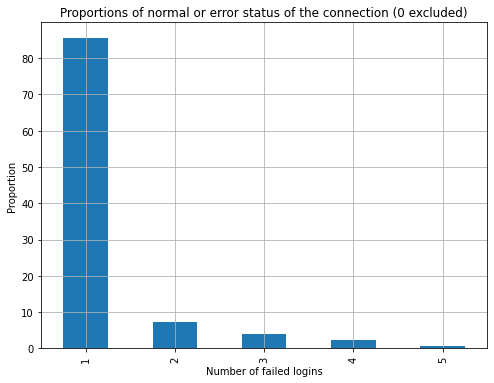

In [27]:
(100*df["num_failed_logins"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("Proportions of normal or error status of the connection")
plt.xlabel("Number of failed logins")
plt.ylabel("Proportion")
plt.show()

(100*df.query("num_failed_logins > 0")["num_failed_logins"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("Proportions of normal or error status of the connection (0 excluded)")
plt.xlabel("Number of failed logins")
plt.ylabel("Proportion")
plt.show();

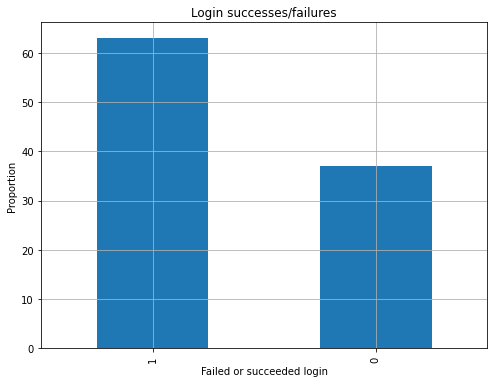

In [28]:
(100*df["logged_in"].value_counts(normalize=True)).plot(kind="bar", grid=True, figsize=(8, 6))
plt.title("Login successes/failures")
plt.xlabel("Failed or succeeded login")
plt.ylabel("Proportion");

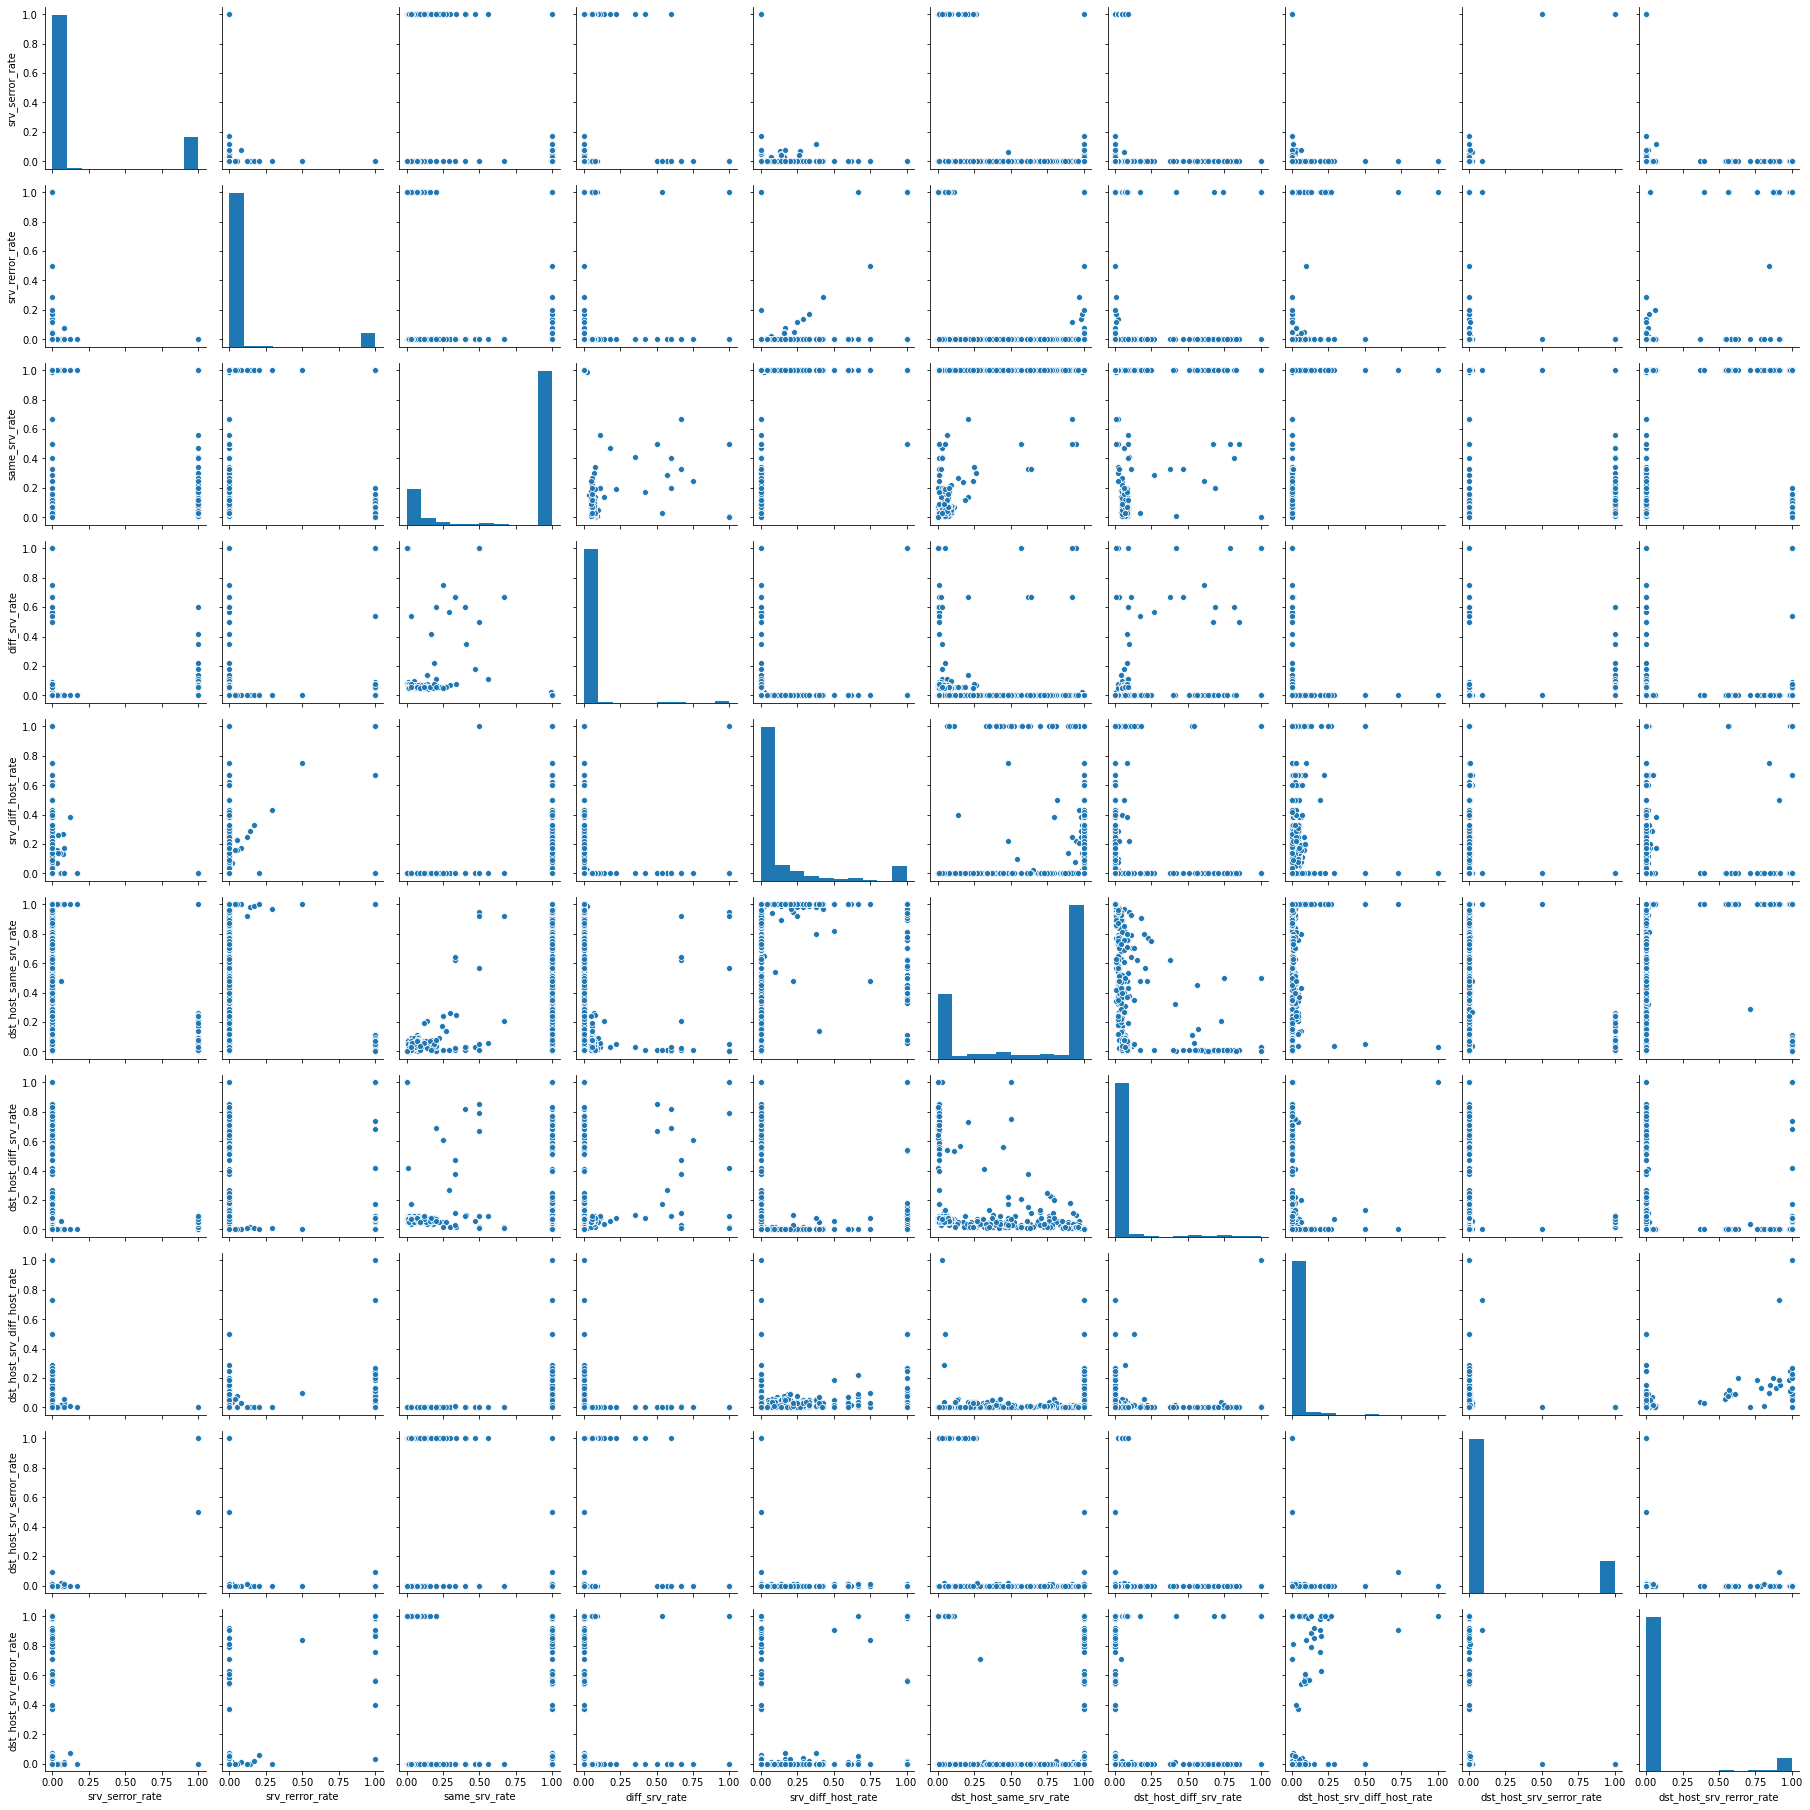

In [29]:
sns.pairplot(df.sample(1000)[[col for col in df.columns if "srv" in col and "rate" in col]])

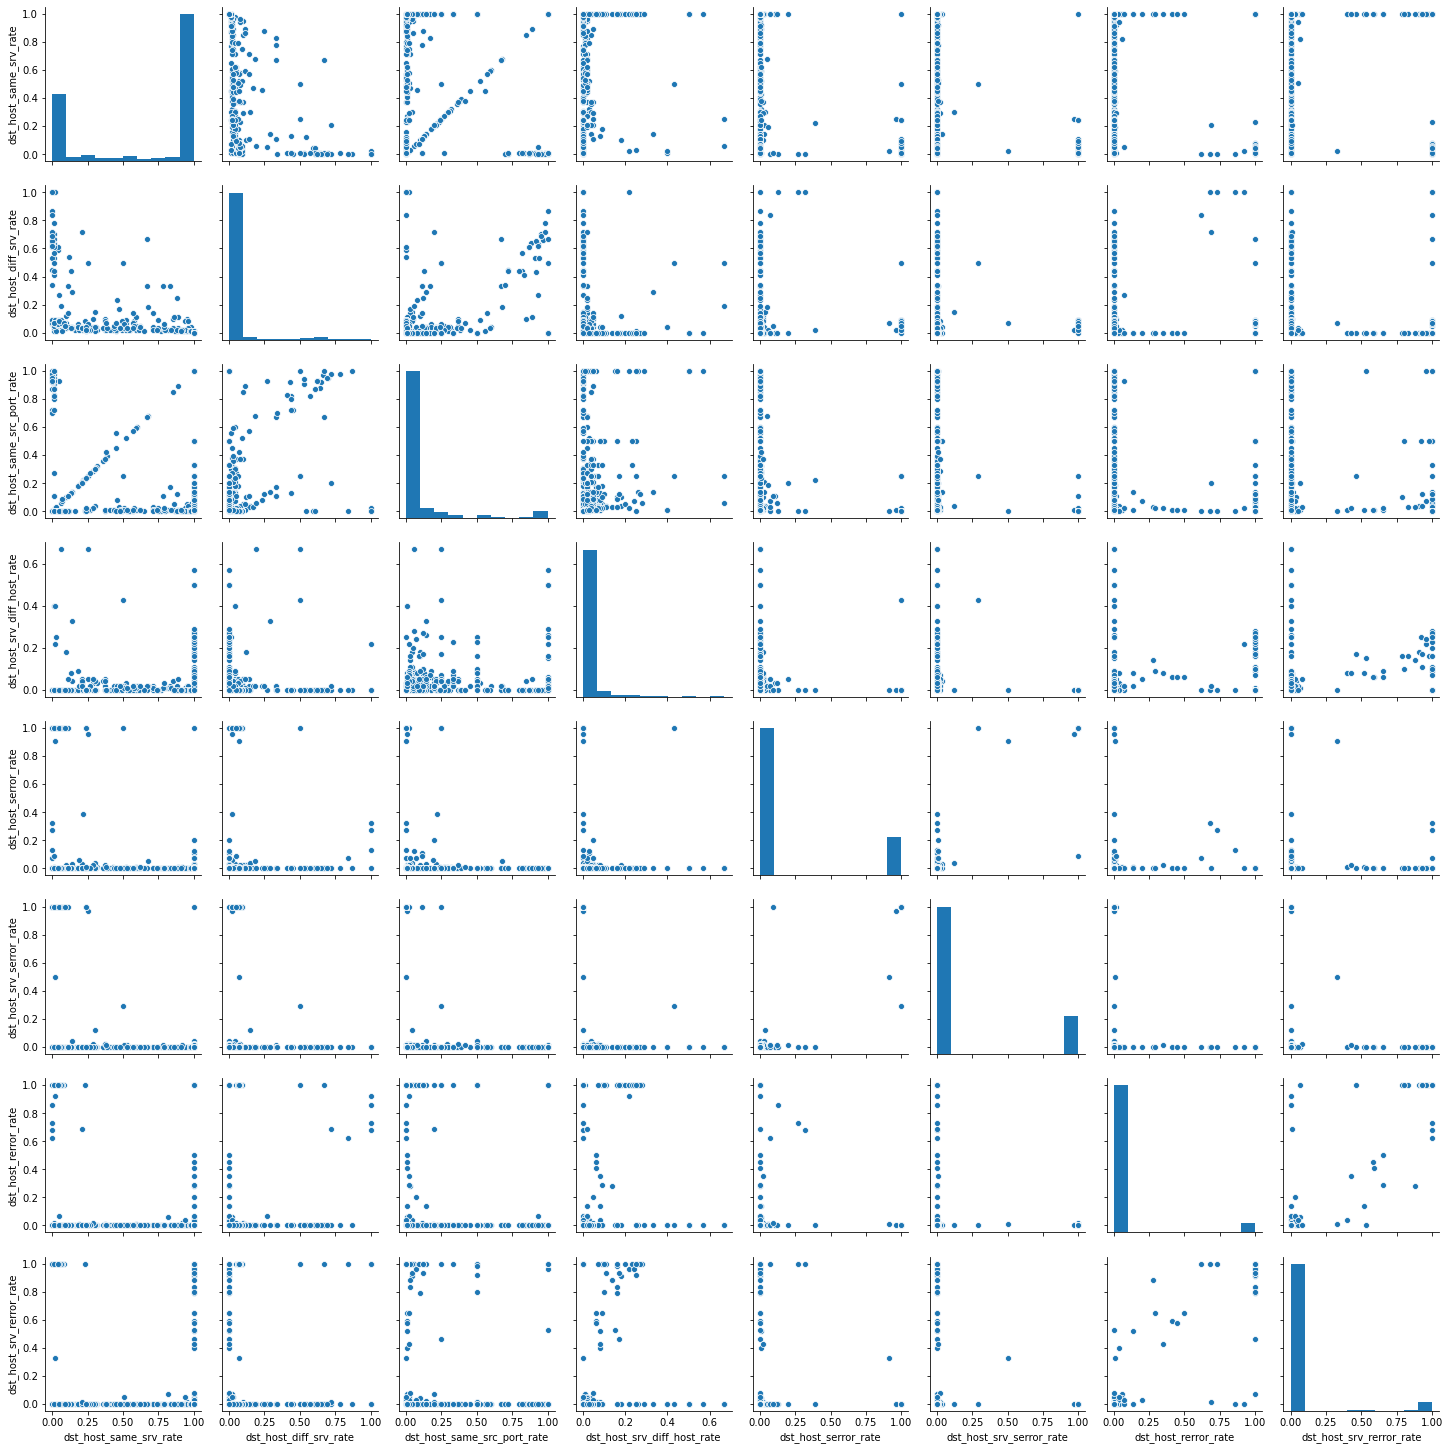

In [30]:
sns.pairplot(df.sample(1000)[[col for col in df.columns if "dst" in col and "rate" in col]])

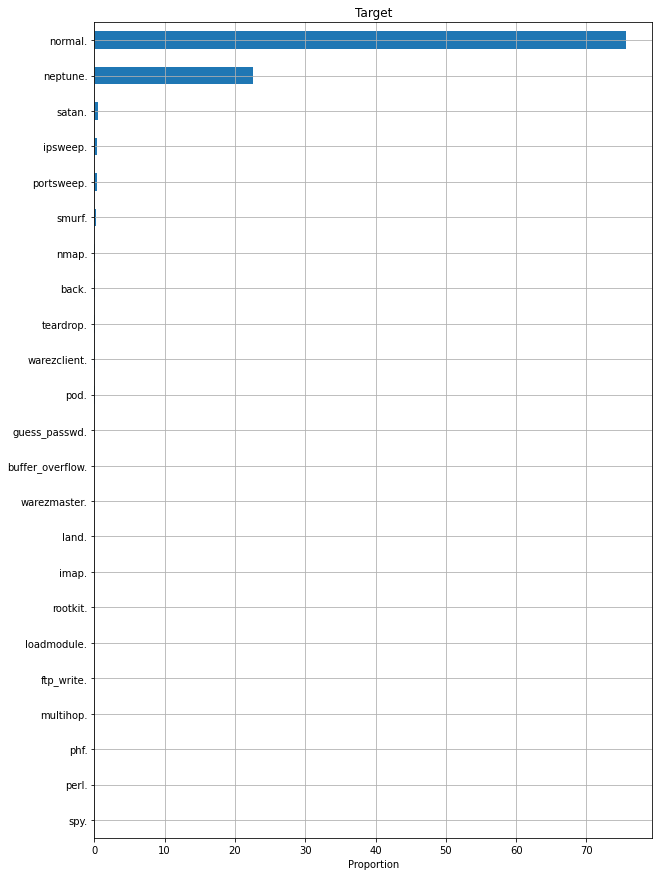

In [31]:
(100*df["target"].value_counts(normalize=True).sort_values()).plot(kind="barh", grid=True, figsize=(10, 15))
plt.title("Target")
plt.xlabel("Proportion");

In [32]:
(100*df["target"].value_counts(normalize=True).sort_values())

spy.                 0.000186
perl.                0.000279
phf.                 0.000372
multihop.            0.000651
ftp_write.           0.000744
loadmodule.          0.000837
rootkit.             0.000930
imap.                0.001116
land.                0.001767
warezmaster.         0.001860
buffer_overflow.     0.002791
guess_passwd.        0.004930
pod.                 0.019163
warezclient.         0.083070
teardrop.            0.085396
back.                0.090047
nmap.                0.144559
smurf.               0.279723
portsweep.           0.331537
ipsweep.             0.346328
satan.               0.466887
neptune.            22.525656
normal.             75.611167
Name: target, dtype: float64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1074992.0,134.890835,1.321605e+03,0.0,0.00,0.00,0.00,5.832900e+04
src_bytes,1074992.0,5837.540050,2.009617e+06,0.0,0.00,219.00,306.00,1.379964e+09
dst_bytes,1074992.0,4873.729754,1.376866e+06,0.0,0.00,332.00,1721.00,1.309937e+09
land,1074992.0,0.000024,4.917892e-03,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,1074992.0,0.002736,8.835986e-02,0.0,0.00,0.00,0.00,3.000000e+00
urgent,1074992.0,0.000036,1.540162e-02,0.0,0.00,0.00,0.00,1.400000e+01
hot,1074992.0,0.054279,9.974618e-01,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,1074992.0,0.000146,1.558112e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,1074992.0,0.630116,4.827732e-01,0.0,0.00,1.00,1.00,1.000000e+00
num_compromised,1074992.0,0.035708,8.232096e+00,0.0,0.00,0.00,0.00,7.479000e+03
